In [1]:
import os

In [2]:
os.getcwd()

'/Users/kwonk/Documents/GitHub/USMA_RAAN'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data from challenge (train and test aka challenge data)
train_df = pd.read_csv('train.csv', header=0)
test_df = pd.read_csv('test.csv', header=0)

In [5]:
# Train model on train_df
train_df.columns

Index(['index', 'Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Hinselmann', 'Schiller', 'Citology',
       'Biopsy'],
      dtype='object')

In [6]:
# Predict Biopsy on test_df
test_df.columns

Index(['index', 'Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Hinselmann', 'Schiller', 'Citology'],
      dtype='object')

In [7]:
#Import Scikit-Learn Library to Build Model
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.formula.api as smf # enables using R-style formulas
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer,confusion_matrix, accuracy_score,recall_score,f1_score,roc_curve,auc,roc_auc_score,classification_report
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # import classifier module
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.externals.six import StringIO # read and write strings as files
from IPython.display import Image 
import pydotplus # provides a Python Interface to Graphviz’s Dot language
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import xgboost as xgb

# standardization of training and testing data
from sklearn.preprocessing import StandardScaler
# Now, fit the NN model
from sklearn.neural_network import MLPClassifier

Using TensorFlow backend.
/Users/kwonk/.local/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [8]:
# We'll impute missing values using the median for numeric columns and the most
# common value for string columns.
# This is based on some nice code by 'sveitser' at http://stackoverflow.com/a/25562948
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)


# all vars
feature_columns_to_use1 = ['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
        'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum',  'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Hinselmann', 'Schiller', 'Citology']

#use the granular vars and use only boolean STDs
feature_columns_to_use2 = ['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 
       'IUD (years)', 'STDs:condylomatosis',
        'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum',  'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Hinselmann', 'Schiller', 'Citology']
#nonnumeric_columns = ['Sex']

# use non-granular variables
feature_columns_to_use3 = ['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 
       'Hormonal Contraceptives', 'IUD',
        'STDs', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum',  'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Hinselmann', 'Schiller', 'Citology']

# like #1 with only granular smokes
feature_columns_to_use4 = ['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
        'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum',  'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Hinselmann', 'Schiller', 'Citology']


## Final model used feature #2 with the variables with granularity and boolean STD variables 

In [9]:
# Join the features from train and test together before imputing missing values,
# in case their distribution is slightly different

big_X2 = train_df[feature_columns_to_use2].append(test_df[feature_columns_to_use2])
big_X2_imputed = DataFrameImputer().fit_transform(big_X2)


In [10]:
# Prepare the inputs for the model

X2,y2 = big_X2_imputed[0:train_df.shape[0]],train_df.Biopsy

In [11]:
#Split the training data into "train" and "test"

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

In [12]:
# Create Decision Tree classifer object

clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2,random_state=111)

In [13]:
# Fit the model (Decision Tree Classifer) on train data

clf2 = clf2.fit(X2_train,y2_train)

In [14]:
#Predict Biopsy on test data

y2_pred = clf2.predict(X2_test)

In [15]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy2:",metrics.accuracy_score(y2_test, y2_pred))

Accuracy2: 0.9637681159420289


In [16]:
# Model F1 Score
df2_cm = classification_report(y2_test,y2_pred)

In [17]:
# High F1-score on test data
print(df2_cm)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       129
           1       0.64      1.00      0.78         9

    accuracy                           0.96       138
   macro avg       0.82      0.98      0.88       138
weighted avg       0.98      0.96      0.97       138



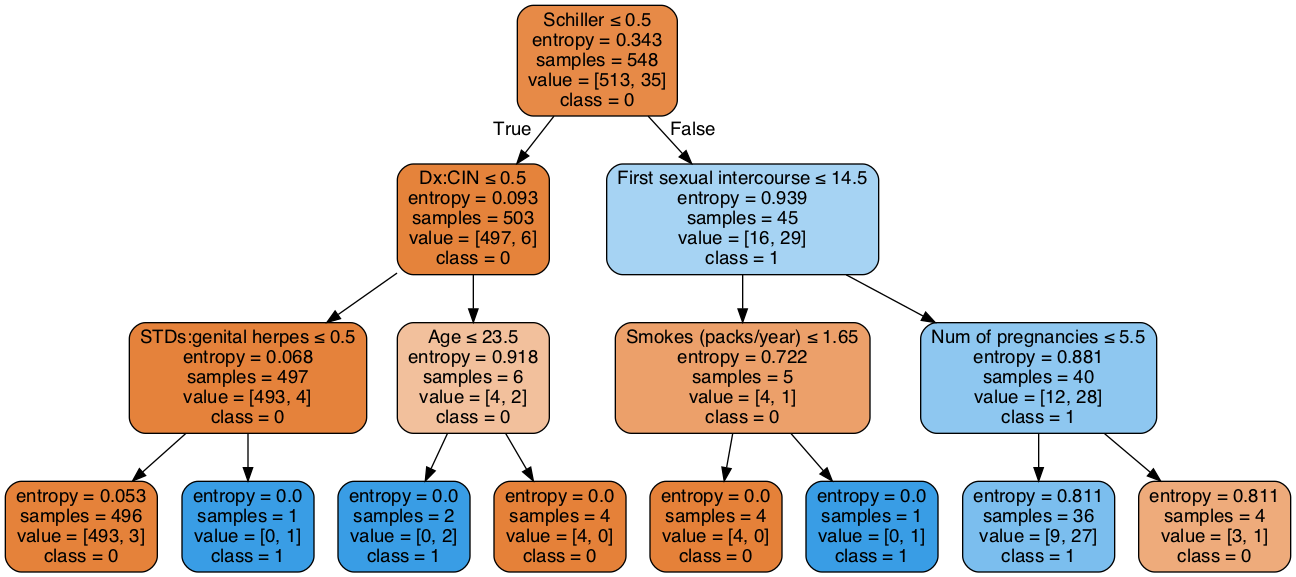

In [18]:
# Create decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_columns_to_use2,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('biposy_2.png')
Image(graph.create_png())

In [19]:
# Get real Challenge Test data
test_X = big_X2_imputed[train_df.shape[0]::]
len(test_X)

172

In [20]:
# Predict on challenge test data with fitted model
clf_predictions =clf2.predict(test_X)

In [21]:
# export predictions to submit - a csv file
# output index and prediction only

clf_submission = pd.DataFrame({ 'index': test_df['index'],
                            'prediction': clf_predictions })
clf_submission.to_csv("clf_submission.csv", index=False)